In [1]:
import pandas as pd
df = pd.read_csv('raisen.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [2]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [3]:
#get dummies class
df['Class'] = df['Class'].map({'Kecimen':0, 'Besni':1})

In [4]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [7]:
len(df[df["Class"]==0]), len(df[df["Class"]==1])

(450, 450)

In [8]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [12]:
#checking feature importance by chi-square test
from sklearn.feature_selection import SelectKBest,chi2
test = SelectKBest(score_func=chi2, k=5)
test.fit(X,Y)
test.scores_



array([6.09782169e+06, 1.27295190e+04, 2.23435122e+03, 1.80425968e+00,
       6.41275337e+06, 8.79172837e-02, 2.56314235e+04])

In [13]:
X_new = test.fit_transform(X,Y)

In [14]:
X_new

array([[ 87524.       ,    442.2460114,    253.291155 ,  90546.       ,
          1184.04     ],
       [ 75166.       ,    406.690687 ,    243.0324363,  78789.       ,
          1121.786    ],
       [ 90856.       ,    442.2670483,    266.3283177,  93717.       ,
          1208.575    ],
       ...,
       [ 99657.       ,    431.7069809,    298.8373229, 106264.       ,
          1292.828    ],
       [ 93523.       ,    476.3440939,    254.1760536,  97653.       ,
          1258.548    ],
       [ 85609.       ,    512.0817743,    215.2719758,  89197.       ,
          1272.862    ]])

In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_new, Y, test_size=0.2, random_state=42)

In [24]:
! pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.1 MB/s eta 0:00:0000:01:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 685.0 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 122.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 137.2 kB/s eta 0:00:00a 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68152 sha256=ec29a6bdba650f0bf97467d26cd8ab22ac83dcac063e1818988c05f164f63ac1
  Stored in directory: /Users/ipriyam26/Library/Caches/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [16]:
# from unittest import result
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

def test_DT(depth:int,spit:int,feature:str,criterion:str):
    DT = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42,min_samples_split=spit,max_features=feature)
    pred = DT.fit(train_x,train_y).predict(test_x)
    return {
        'depth':depth,
        'split':spit,
        'feature':feature,
        'criterion':criterion,
        'accuracy':accuracy_score(test_y,pred),
        'confusion_matrix':confusion_matrix(test_y,pred),
        'precision':precision_score(test_y,pred),
        'recall':recall_score(test_y,pred),
        'f1_score':f1_score(test_y,pred),
    }


In [25]:
import itertools
results = []
for depth, spit in itertools.product(range(10,101), range(4,10,2)):
    for feature in ['auto','sqrt','log2']:
        for criterion in ['gini','entropy']:
            result = test_DT(depth,spit,feature,criterion)
            results.append(result)

results = sorted(results, key=lambda x: x['accuracy'], reverse=True)

In [27]:
print(results[:10])

[{'depth': 10, 'split': 4, 'feature': 'auto', 'criterion': 'entropy', 'accuracy': 0.8388888888888889, 'confusion_matrix': array([[82, 12],
       [17, 69]]), 'precision': 0.8518518518518519, 'recall': 0.8023255813953488, 'f1_score': 0.8263473053892216}, {'depth': 10, 'split': 4, 'feature': 'sqrt', 'criterion': 'entropy', 'accuracy': 0.8388888888888889, 'confusion_matrix': array([[82, 12],
       [17, 69]]), 'precision': 0.8518518518518519, 'recall': 0.8023255813953488, 'f1_score': 0.8263473053892216}, {'depth': 10, 'split': 4, 'feature': 'log2', 'criterion': 'entropy', 'accuracy': 0.8388888888888889, 'confusion_matrix': array([[82, 12],
       [17, 69]]), 'precision': 0.8518518518518519, 'recall': 0.8023255813953488, 'f1_score': 0.8263473053892216}, {'depth': 10, 'split': 6, 'feature': 'auto', 'criterion': 'entropy', 'accuracy': 0.8388888888888889, 'confusion_matrix': array([[82, 12],
       [17, 69]]), 'precision': 0.8518518518518519, 'recall': 0.8023255813953488, 'f1_score': 0.826347

In [28]:
result_df = pd.DataFrame(results)

In [29]:
result_df

,depth,split,feature,criterion,accuracy,confusion_matrix,precision,recall,f1_score
0,10,4,auto,entropy,0.838889,"[[82, 12], [17, 69]]",0.851852,0.802326,0.826347
1,10,4,sqrt,entropy,0.838889,"[[82, 12], [17, 69]]",0.851852,0.802326,0.826347
2,10,4,log2,entropy,0.838889,"[[82, 12], [17, 69]]",0.851852,0.802326,0.826347
3,10,6,auto,entropy,0.838889,"[[82, 12], [17, 69]]",0.851852,0.802326,0.826347
4,10,6,sqrt,entropy,0.838889,"[[82, 12], [17, 69]]",0.851852,0.802326,0.826347
...,...,...,...,...,...,...,...,...,...
1633,100,6,sqrt,gini,0.833333,"[[81, 13], [17, 69]]",0.841463,0.802326,0.821429
1634,100,6,log2,gini,0.833333,"[[81, 13], [17, 69]]",0.841463,0.802326,0.821429
1635,100,8,auto,gini,0.833333,"[[81, 13], [17, 69]]",0.841463,0.802326,0.821429
1636,100,8,sqrt,gini,0.833333,"[[81, 13], [17, 69]]",0.841463,0.802326,0.821429


<AxesSubplot:xlabel='depth', ylabel='accuracy'>

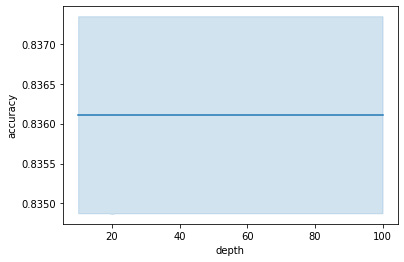

In [20]:
#make a graph to visualize the results better
import seaborn as sns
sns.lineplot(x='depth', y='accuracy', data=pd.DataFrame(results))

In [33]:
from sklearn import tree

DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42,min_samples_split=6,max_features='log2')
clf = DT.fit(train_x,train_y)

print(tree.export_text(DT))


|--- feature_1 <= 422.42
|   |--- feature_1 <= 354.78
|   |   |--- feature_4 <= 1100.66
|   |   |   |--- class: 0
|   |   |--- feature_4 >  1100.66
|   |   |   |--- class: 1
|   |--- feature_1 >  354.78
|   |   |--- feature_4 <= 1124.34
|   |   |   |--- class: 0
|   |   |--- feature_4 >  1124.34
|   |   |   |--- class: 0
|--- feature_1 >  422.42
|   |--- feature_1 <= 452.89
|   |   |--- feature_1 <= 441.03
|   |   |   |--- class: 1
|   |   |--- feature_1 >  441.03
|   |   |   |--- class: 0
|   |--- feature_1 >  452.89
|   |   |--- feature_0 <= 91927.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  91927.50
|   |   |   |--- class: 1



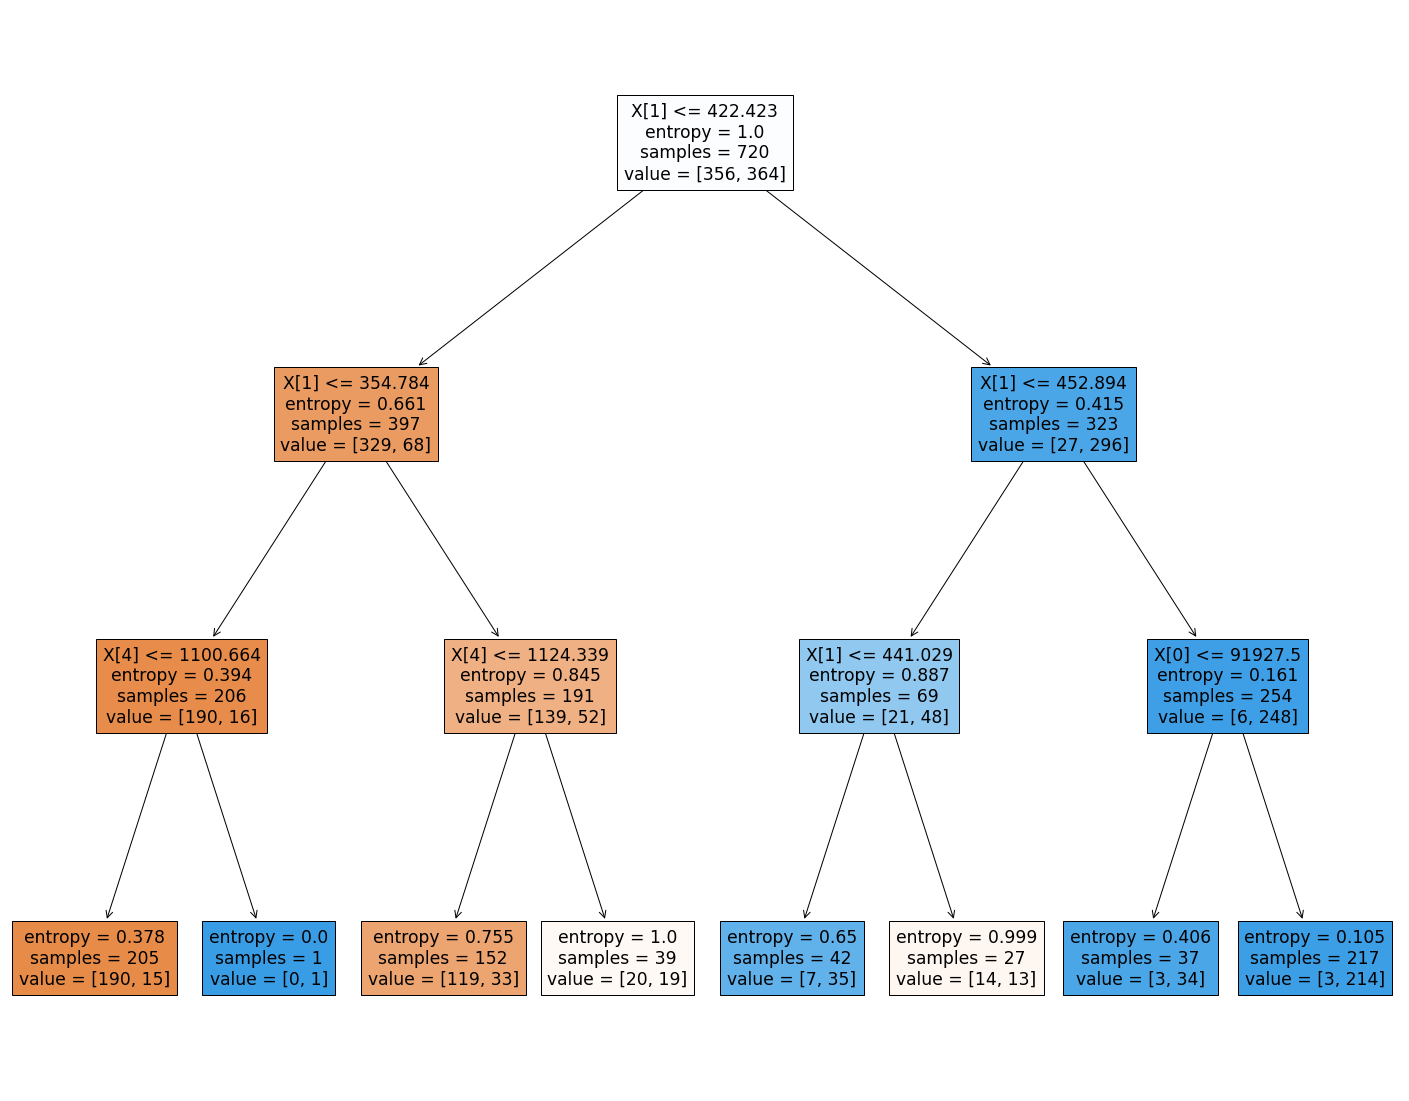

In [36]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                #    feature_names=iris.feature_names,  
                #    class_names=iris.target_names,
                   filled=True)